Training Data Sample:
                                                text  label
0  $BYND - JPMorgan reels in expectations on Beyo...      0
1  $CCL $RCL - Nomura points to bookings weakness...      0
2  $CX - Cemex cut at Credit Suisse, J.P. Morgan ...      0
3  $ESS: BTIG Research cuts to Neutral https://t....      0
4  $FNKO - Funko slides after Piper Jaffray PT cu...      0

Validation Data Sample:
                                                text  label
0  $ALLY - Ally Financial pulls outlook https://t...      0
1  $DELL $HPE - Dell, HPE targets trimmed on comp...      0
2  $PRTY - Moody's turns negative on Party City h...      0
3                   $SAN: Deutsche Bank cuts to Hold      0
4                  $SITC: Compass Point cuts to Sell      0


/Users/carlosillanaldariz/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
299/299 ━━━━━━━━━━━━━━━━━━━━ 16s 47ms/step - accuracy: 0.3138 - loss: 1.1011 - val_accuracy: 0.6478 - val_loss: 1.0952
Epoch 2/3
299/299 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.3172 - loss: 1.0995 - val_accuracy: 0.1453 - val_loss: 1.0982
Epoch 3/3
299/299 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.3285 - loss: 1.0991 - val_accuracy: 0.6654 - val_loss: 0.8670
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

Classification Report:
              precision    recall  f1-score   support

     Bearish       0.00      0.00      0.00       347
     Bullish       0.38      0.65      0.48       475
     Neutral       0.81      0.82      0.81      1566

    accuracy                           0.67      2388
   macro avg       0.40      0.49      0.43      2388
weighted avg       0.61      0.67      0.63      2388



/Users/carlosillanaldariz/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/carlosillanaldariz/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/carlosillanaldariz/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

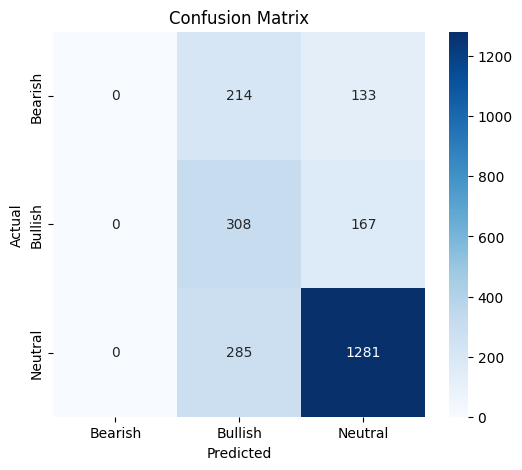

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ## 1. Load the dataset
def load_data(train_path, valid_path):
    """Load training and validation datasets from CSV files."""
    train_df = pd.read_csv(train_path)
    valid_df = pd.read_csv(valid_path)
    return train_df, valid_df

train_path = "sent_train.csv"
valid_path = "sent_valid.csv"
train_df, valid_df = load_data(train_path, valid_path)

# ## 2. Visualize the dataset
print("Training Data Sample:")
print(train_df.head())
print("\nValidation Data Sample:")
print(valid_df.head())

# ## 3. Preprocess the text data
MAX_NUM_WORDS = 10000  # Maximum vocabulary size
MAX_SEQUENCE_LENGTH = 50  # Maximum sequence length for padding
EMBEDDING_DIM = 100  # Word embedding dimension

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df["text"])

# Convert text to sequences
X_train = tokenizer.texts_to_sequences(train_df["text"])
X_valid = tokenizer.texts_to_sequences(valid_df["text"])

# Pad sequences to ensure uniform input size
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH, padding="post", truncating="post")
X_valid = pad_sequences(X_valid, maxlen=MAX_SEQUENCE_LENGTH, padding="post", truncating="post")

# Convert labels to categorical format
y_train = to_categorical(train_df["label"], num_classes=3)
y_valid = to_categorical(valid_df["label"], num_classes=3)

# Calculate class weights to handle imbalance
labels = train_df["label"].values
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# ## 4. Define the LSTM Model
def build_lstm_model():
    """Build a sequential LSTM model for sentiment classification."""
    model = Sequential([
        Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
        LSTM(128, return_sequences=True),
        LSTM(64),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dense(3, activation='softmax')  # 3 output classes
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = build_lstm_model()
model.summary()

# ## 5. Train the model
EPOCHS = 3
BATCH_SIZE = 32

history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=EPOCHS, batch_size=BATCH_SIZE, class_weight=class_weights)

# ## 6. Evaluate the Model
y_pred = model.predict(X_valid)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_valid, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=["Bearish", "Bullish", "Neutral"]))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_true, y_pred_classes), annot=True, fmt='d', cmap='Blues', xticklabels=["Bearish", "Bullish", "Neutral"], yticklabels=["Bearish", "Bullish", "Neutral"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
